# Arctic Dataset Notebook

The dataset was found [here](https://github.com/big-data-lab-umbc/sea-ice-prediction) and the screenshot of feature significance came from an article found [here](https://s3.us-east-1.amazonaws.com/climate-change-ai/papers/icml2021/50/paper.pdf).

**MLA citation:** `Ali, Sahara, et al. "Sea Ice Forecasting using Attention-based Ensemble LSTM." arXiv preprint arXiv:2108.00853 (2021).`

### 0 Setup

For help, type `hint(x)`, replacing x with section number

In [20]:
# Run this cell
import matplotlib.pyplot as plt
import datascience as ds
import pandas as pd
import numpy as np
from IPython.lib.display import YouTubeVideo
from Hints.hints import hint
from IPython.display import Image

### 1 Background
Learn about the context of the arctic data (provided in the `Data` folder).

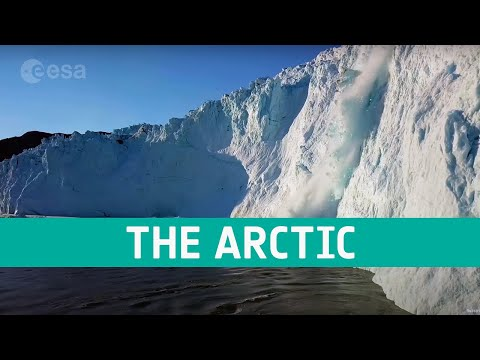

In [44]:
# Run this cell
YouTubeVideo("V4lwQcho1No")

The video explores three fundamental topics, in chronological order:
1. Using primarily satelites and weather stations, arctic environmental variables are measured and recorded
2. These data can be used to predict future sea ice extent 
3. Predictions can help drive change in the future to preserve arctic sea ice and affected ecosystems

In the dataset provided, sea ice extent is a **target variable**. There are 10 **features** (the meaning of the features can be found [here](Data/features.png)).

### 2 Load data

- Load data into `full_data`. 
- Load the names of the features into `features_list`. Print `features_list`.

In [24]:
full_data = pd.read_csv('Data/arctic_data.csv').drop('Day',axis=1)
#full_data
features_list = full_data.columns.values.tolist()
features_list.remove('Year')
print(features_list)

['wind_10m', 'specific_humidity', 'LW_down', 'SW_down', 'rainfall', 'snowfall', 'sosaline', 'sst', 't2m', 'surface_pressure', 'sea_ice_extent']


### 3 Data pre-processing

- Create a new table, called `yearly_data`, where each row contains averaged feature data over one year. Display the first 4 rows of the table.

In [25]:
yearly_data = full_data.groupby('Year')[features_list].mean()
yearly_data.reset_index().head(4)

,Year,wind_10m,specific_humidity,LW_down,SW_down,rainfall,snowfall,sosaline,sst,t2m,surface_pressure,sea_ice_extent
0,1979,5.077644,2.218661,237.496931,96.334141,1.346560,0.708850,33.252387,274.359519,263.531548,981.987060,1.232579e+07
1,1980,5.120355,2.245722,239.288258,96.726462,1.284813,0.695901,33.262445,274.489489,264.163376,982.866138,1.233416e+07
2,1981,5.188373,2.300668,243.107254,96.078586,1.393690,0.760159,33.246004,274.362807,264.962616,981.639004,1.212972e+07
3,1982,5.145196,2.196114,237.620653,97.621456,1.362952,0.738999,33.272504,274.287460,263.673480,981.125527,1.244502e+07


### 4 Graph trends

- Graph `sst`, where `year` is the independent variable.
- Add a linear trendline for `sst`.
- Display the equation of the trendline as the title of the plot.
- Save the graph in the `Graphs` folder. 

In [42]:
plt.figure(figsize=(8,6))
x = yearly_data.index
#Scatter plot
plt.scatter(x,yearly_data['sst'])
#Line of best fit
a, b = np.polyfit(x,yearly_data['sst'],1)
plt.plot(x, a*x+b,linestyle='--')
plt.xlim([1978,2019])
plt.ylim([273,276])
plt.title("Arctic Ocean Sea Surface Temperature from 1979 to 2018")
plt.xlabel("Year")
plt.ylabel("Sea Surface Temperature (in Kelvin)")
plt.savefig("Graphs/plot.png",bbox_inches='tight')

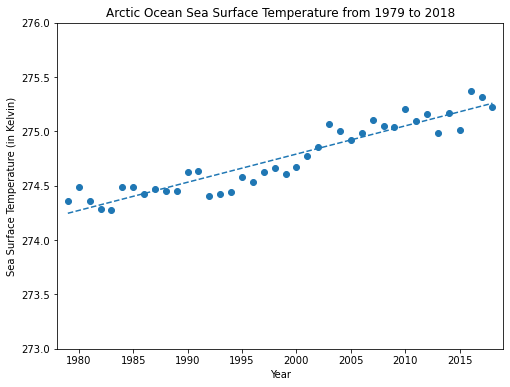

In [43]:
Image("Graphs/plot.png")

### 5 Interpretation

What trends are present in the graph? What insights can you take away from this model? What may be the cause of the trend?

From the plot and the trendline, it is clear that the sea surface temperatures have been steadily rising over the past few decades. This is strong evidence for the concept of global warming. This is likely the combination of causes also responsible for other symptoms of climate change, such as increased usage of fossil fuels.

### Feedback

#### Praise:
This notebook does an excellent job of analyzing a part of the Arctic dataset and drawing conclusions from a visualization. The instructions were also very clear and thorough.
#### Criticism:
In order to give a better picture of the overall trend and not relying on only one statistic, the notebook could have visualized more features of the dataset to see if they supported the conclusion from SST alone.